Aakash
EP21BTECH11001

In [437]:
import matplotlib.pyplot as plt
import numpy as np

1. Unit norm ball: Recall the definition of a unit norm ball from class that we defined in a normed linear
space (X, ||.||): B ̄ = {x ∈ X : ||x|| ≤ 1}. Assume X = R2

(a) Write a function that accepts p and plots the ||.||p unit norm ball. Test with integer p ≥ 1 as well
as 0 < p < 1.

In [441]:
def norm_bal(p,ax):
    x=np.linspace(-1,1,100);
    y = (1 - np.abs(x)**p)**(1/p);  
    ax.plot(x, y, label=f'p={p}')
    ax.plot(x, -y)
    
    ax.set_title(f'For p={p} Unit Norm Ball')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    

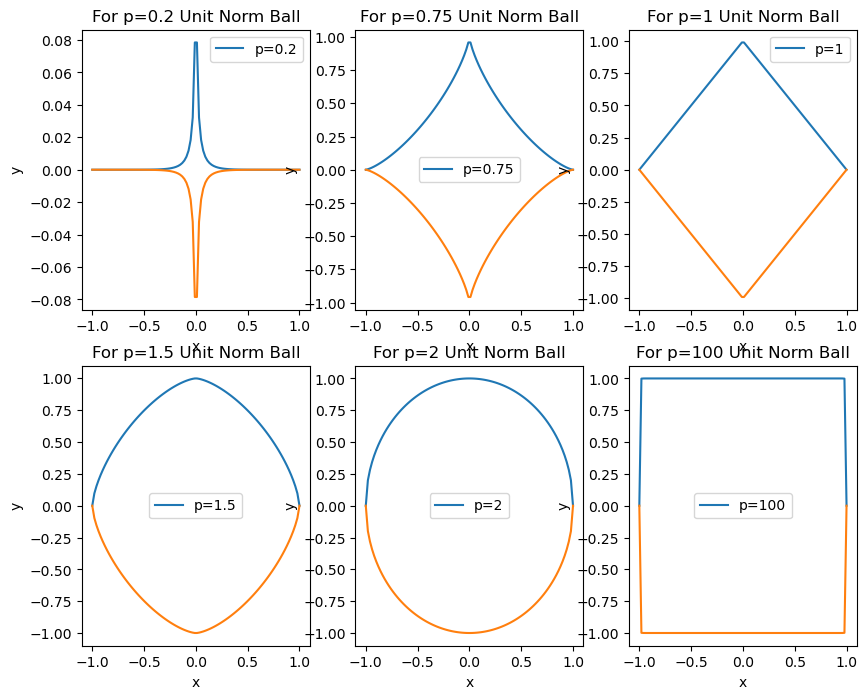

In [443]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# for p = 0.2
norm_bal(0.2, axs[0, 0])

# for p = 0.75
norm_bal(0.75, axs[0, 1])

# for p = 1
norm_bal(1, axs[0, 2])

# for p = 1.5
norm_bal(1.5, axs[1, 0])

# for p = 2
norm_bal(2, axs[1, 1])

# for p = 100
norm_bal(100, axs[1, 2])




plt.show()

(b) We claimed that for integer p ≥ 1 the unit norm ball is convex. Is this clear from the unit norm
ball plots? What happens when 0 < p < 1? Print your observations.

In [446]:
print("For p>=1 as we can see in above result norm ball is convex.");
print("For 0<p<1 as we can see in above result norm ball is not convex.");

For p>=1 as we can see in above result norm ball is convex.
For 0<p<1 as we can see in above result norm ball is not convex.


2. Completeness: Recall from class that a metric space (X, d) is said to be complete if all Cauchy se-
quences in X converge to a point in X. Show with a numerical example that the space of continuous

functions defined on the closed interval [0, 1] and denoted C[0, 1] is incomplete with respect to the
metric derived from the L1 norm (i.e., d(f , g) = || f − g||1 =
R
1
0
| f(x) − g(x)|dx for any f , g ∈ C[0, 1]).

Code your example and demonstrate the result either using a plot or numerically.

 Solution -> In the pdf

3. Entropy of a discrete RV: Recall the definition of entropy of a discrete RV X from class, H(X) =
− ∑
x∈X
p(x) log p(x), where p(x) is the probability mass function (PMF) of X, and X is the set of
possible values that the random variable X can take.

(a) Write a function that accepts a PMF as input and outputs the entropy in bits. Do check for the
condition of a value being assigned zero probability.

In [452]:
def entropy(pmf):
    pmf=np.array(pmf);
    if(np.sum(pmf)!=1):
        raise ValueError("The PMF does not sum to 1.")
    pmf=pmf[pmf>0];
    res=-np.sum(pmf*np.log2(pmf));
    return res;
    

In [454]:
pmf = [0.5, 0.20,0.30] 
try:
    result = entropy(pmf)
    print(f"Entropy: {result} bits")
except ValueError as e:
    print(f"Error: {e}")

Entropy: 1.4854752972273344 bits


(b) Now use the above function to plot the entropy of X ∼ Bern(p) as a function of p. Where does
this plot attain its maximum?

In [457]:
def bern(p):
    if(p==0 or p==1):
        return 0;
    res=-(p*np.log2(p)+(1-p)*np.log2(1-p));
    return res;

In [459]:
p_values=np.linspace(0,1,100)
ent_values=[bern(p) for p in p_value]

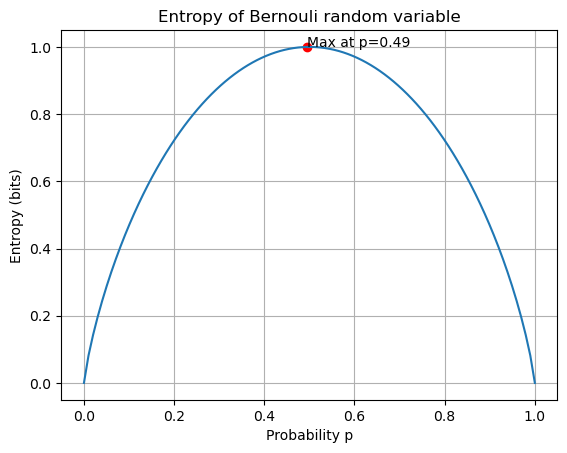

Maximum entropy is 0.999926399368686 bits at p = 0.494949494949495


In [461]:
plt.plot(p_values,ent_values)
plt.title('Entropy of Bernouli random variable')
plt.xlabel('Probability p')
plt.ylabel('Entropy (bits)')
plt.grid(True)
max_entropy=max(ent_values);
max_p = p_values[np.argmax(ent_values)]
plt.scatter(max_p, max_entropy, color='red')
plt.text(max_p, max_entropy, f'Max at p={max_p:.2f}')

plt.show();
print(f"Maximum entropy is {max_entropy} bits at p = {max_p}");

4. Joint entropy: The joint entropy of a pair of discrete random variables X and Y with joint distribution
p(x, y) is defined as H(X,Y) = −E(x,y)∼p(x,y)

log p(X,Y) and the conditional entropy is defined as

H(Y|X) = −E(x,y)∼p(x,y)

log p(Y|X). Show that: H(X,Y) = H(X) + H(Y|X).

#Solution -> In the PDF ATTACHED

5. Mutual information: The mutual information between two random variables X and Y is defined as
I(X;Y) = E(x,y)∼p(x,y)
log p(X,Y)
p(x)p(y)
. Show that I(X;Y) = H(X) − H(X|Y) = H(Y) − H(Y|X).

#Solution-> In the PDF ATTACHED

6. Numerical exercise: If p(x = 0, y = 0) = p(x = 0, y = 1) = p(x = 1, y = 1) = 1/3, p(x = 1, y = 0) =
0 (where X,Y are random variables taking values 0 or 1, find
(a) H(X), H(Y)
(b) H(X|Y), H(Y|X)
(c) H(X,Y) 
(d) H(Y) − H(Y|X)
(e) I(X;Y) 

#Solution-> IN the PDF ATTACHED

7 Image entropy: Download a gray scale image from the link provided in the instructions. By gray
scale is meant that the image has one intensity channel. Further, the pixel intensities are in the range
[0, 255].

(a) Write a function that accepts an image as input and returns its normalized histogram. Note that
the normalized histogram is found by dividing the original histogram by the total number of
pixels in the image.

In [475]:
def compute_normalized_histogram(image_path):
    
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)

    histogram, _ = np.histogram(image_array, bins=256, range=(0, 256))

    total_pixels = image_array.size
    normalized_histogram = histogram / total_pixels

    return normalized_histogram


def compute_image_entropy(image_path):
    
    histogram = compute_normalized_histogram(image_path)
    return entropy(histogram)

image_path = './4.1.01.tiff'
image_entropy = compute_image_entropy(image_path)
print(f"Entropy of the image: {image_entropy} bits")


Entropy of the image: 7.0525306595828825 bits


(b) Use your entropy function from the earlier problem to find the image entropy. Experiment with
different gray scale images from the aforementioned link and note your observations.

In [478]:
image_path1 = './4.1.01.tiff'
image_entropy = compute_image_entropy(image_path1)
print(f"Entropy of the image {image_path1}: {image_entropy} bits")
image_path2 = './4.1.02.tiff'
image_entropy = compute_image_entropy(image_path2)
print(f"Entropy of the image {image_path2}: {image_entropy} bits")
image_path3 = './4.1.03.tiff'
image_entropy = compute_image_entropy(image_path3)
print(f"Entropy of the image {image_path3}: {image_entropy} bits")


print(f'Entropy of images: {image_path1}>{image_path2}>{image_path3}')
print(f'Because diverse pixel value in images are in order:{image_path1}>{image_path2}>{image_path3}')

Entropy of the image ./4.1.01.tiff: 7.0525306595828825 bits
Entropy of the image ./4.1.02.tiff: 6.420715979044396 bits
Entropy of the image ./4.1.03.tiff: 5.593940196698405 bits
Entropy of images: ./4.1.01.tiff>./4.1.02.tiff>./4.1.03.tiff
Because diverse pixel value in images are in order:./4.1.01.tiff>./4.1.02.tiff>./4.1.03.tiff


8. Joint PMF and joint entropy: For this problem, work with the given stereo image pair labeled
left.png and right.png respectively. As in the previous question, both images are gray scale.

(a) Write a function that accepts this stereo image pair as input, and outputs the normalized joint
histogram in addition to plotting it.

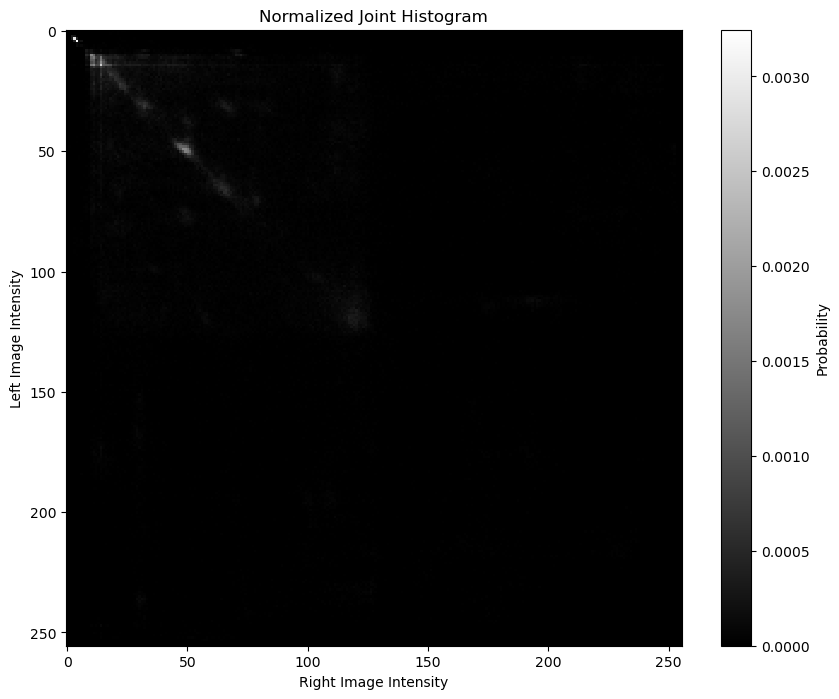

In [483]:

def compute_plot_joint_histogram(left_img_path, right_img_path, bins=256):
    # Load images
    left_img = Image.open(left_img_path).convert('L')
    right_img = Image.open(right_img_path).convert('L')
    
    left_array = np.array(left_img)
    right_array = np.array(right_img)
    
    joint_histogram, xedges, yedges = np.histogram2d(left_array.flatten(), right_array.flatten(), bins=bins, range=[[0, 256], [0, 256]])
    

    joint_histogram_normalized = joint_histogram / joint_histogram.sum()
    

    plt.figure(figsize=(10, 8))
    plt.imshow(joint_histogram_normalized, interpolation='nearest', cmap='gray')
    plt.xlabel('Right Image Intensity')
    plt.ylabel('Left Image Intensity')
    plt.title('Normalized Joint Histogram')
    plt.colorbar(label='Probability')
    plt.show()
    
    return joint_histogram_normalized

joint_histogram_normalized = compute_plot_joint_histogram('./left.png', './right.png')


(b) Write a function that accepts the joint PMF of a pair of random variables as input and outputs
the joint entropy.

In [486]:
def joint_entropy(joint_pmf):
    
    nonzero_pmf = joint_pmf[joint_pmf > 0] 
    res = -np.sum(nonzero_pmf * np.log2(nonzero_pmf))
    return res

(c) Test your joint entropy function using the normalized joint histogram computed in Part a).

In [489]:
joint_entropy = joint_entropy(joint_histogram_normalized)
print(f"Joint Entropy: {joint_entropy} bits")


Joint Entropy: 13.675203263382308 bits


9. Conditional PMF and conditional entropy: Continue to work with the stereo image pair.

(a) Write a function that accepts as input the joint PMF of a pair of random variables, the index of the
conditioning random variable, and the value of the conditioning random variable. The function
must output the appropriate conditional PMF.

In [494]:
def compute_conditional_pmf(joint_pmf, conditioning_index, conditioning_value):

    num_bins = joint_pmf.shape[0]

    if conditioning_index == 0:
        sum_conditioned = np.sum(joint_pmf[conditioning_value, :])
        if sum_conditioned == 0:
            conditional_pmf = np.zeros(num_bins)
        else:
            conditional_pmf = joint_pmf[conditioning_value, :] / sum_conditioned
    elif conditioning_index == 1:
        sum_conditioned = np.sum(joint_pmf[:, conditioning_value])
        if sum_conditioned == 0:
            conditional_pmf = np.zeros(num_bins)
        else:
            conditional_pmf = joint_pmf[:, conditioning_value] / sum_conditioned
    else:
        raise ValueError("Invalid conditioning index. Must be 0 or 1.")
    
    return conditional_pmf


(b) Write a function that accepts as input the joint PMF and the index of the conditioning RV, and
outputs the conditional entropy.

In [535]:
def compute_conditional_entropy(joint_pmf, conditioning_index):
    num_bins = joint_pmf.shape[0]
    conditional_entropy = 0.0

    for i in range(num_bins):
        conditional_pmf = compute_conditional_pmf(joint_pmf, conditioning_index, i)
        temp_pmf = conditional_pmf[conditional_pmf > 0] 
        if temp_pmf.size > 0:
            conditional_entropy += np.sum(temp_pmf * np.log2(temp_pmf))

    return -conditional_entropy


(c) Test your conditional entropy function using the normalized joint histogram computed in (a), for your choice of the conditioning RV.

In [538]:
conditional_entropy = compute_conditional_entropy(joint_histogram_normalized, 1)  
print(f"Conditional Entropy: {conditional_entropy} bits")


Conditional Entropy: 1526.7984479870836 bits


10. KL divergence: We showed in class that for PMFs p and q defined on X , D(p||q) ≥ 0, D(q||p) 6=
D(p||q). This problem explores these properties experimentally.

(a) Write a function that accepts as input two PMFs p and q as input, and outputs D(p||q).

In [505]:
import numpy as np

def KL_divergence(p, q):
    
    p = np.array(p)
    q = np.array(q)
    
    if(np.sum(p)!=1 or np.sum(q)!=1):
        raise ValueError("The PMF does not sum to 1.")
       
    if np.any(p < 0) or np.any(q < 0):
        raise ValueError("PMFs must contain non-negative values.")
        
    nonzero_mask_p = p > 0
    nonzero_mask_q = q > 0
    
    kl_div = 0
    if np.any(nonzero_mask_p):
        kl_div += np.sum(p[nonzero_mask_p] * np.log2(p[nonzero_mask_p] / q[nonzero_mask_p]))
    
    return kl_div




In [507]:
p = [0.4, 0.6] 
q = [0.5, 0.5]

try:
    kl_div_value = KL_divergence(p, q)
    print(f"KL Divergence D(p || q): {kl_div_value:} bits")
except ValueError as e:
    print(f"Error: {e}")


KL Divergence D(p || q): 0.029049405545331364 bits


(b) As discussed in class, let p ∼ Bern(r) and q ∼ Bern(s). For a fixed value of r, vary s and do the
following:

i. Plot D(p||q), D(q||p).

In [511]:

def kl_divergence_bernoulli(r, s):
    
    p_0 = 1 - r
    p_1 = r
    q_0 = 1 - s
    q_1 = s
    
    
    # KL Divergence D(p || q)
    kl_div_p_q = 0
    if p_1 > 0 and q_1 > 0:
        kl_div_p_q += p_1 * np.log2(p_1 / q_1)
    if p_0 > 0 and q_0 > 0:
        kl_div_p_q += p_0 * np.log2(p_0 / q_0)
    
    # KL Divergence D(q || p)
    kl_div_q_p = 0
    if q_1 > 0 and p_1 > 0:
        kl_div_q_p += q_1 * np.log2(q_1 / p_1)
    if q_0 > 0 and p_0 > 0:
        kl_div_q_p += q_0 * np.log2(q_0 / p_0)
    
    return kl_div_p_q, kl_div_q_p


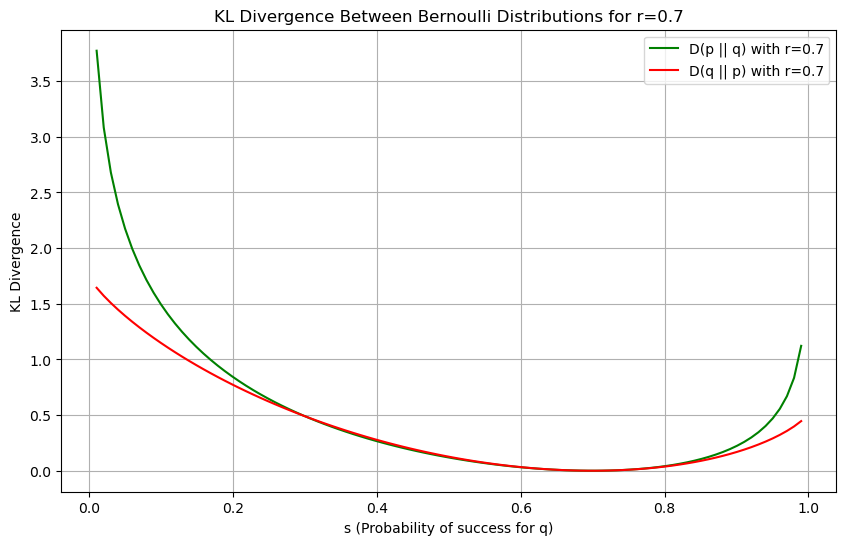

In [513]:

r = 0.7 

s_values = np.linspace(0.01, 0.99, 100)
kl_div_p_q_values = []
kl_div_q_p_values = []
min_kl=[]

for s in s_values:
    kl_div_p_q, kl_div_q_p = kl_divergence_bernoulli(r, s)
    kl_div_p_q_values.append(kl_div_p_q)
    kl_div_q_p_values.append(kl_div_q_p)
    min_kl.append(np.abs(kl_div_p_q-kl_div_q_p))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(s_values, kl_div_p_q_values, label=f'D(p || q) with r={r}', color='green')
plt.plot(s_values, kl_div_q_p_values, label=f'D(q || p) with r={r}', color='red')
plt.xlabel('s (Probability of success for q)')
plt.ylabel('KL Divergence')
plt.title(f'KL Divergence Between Bernoulli Distributions for r={r}')
plt.legend()
plt.grid(True)
plt.show()


ii. Verify that D(p||q), D(q||p) are indeed non-negative.

In [516]:

print('From above result we can see that D(p||q), D(q||p) are non-negative ')
print('The Kullback-Leibler divergence 𝐷(𝑝∥𝑞)D(p∥q) is always non-negative for any two probability distributions p and q');
print('It measures how one probability distribution diverges from a second, reference probability distribution.');

From above result we can see that D(p||q), D(q||p) are non-negative 
The Kullback-Leibler divergence 𝐷(𝑝∥𝑞)D(p∥q) is always non-negative for any two probability distributions p and q
It measures how one probability distribution diverges from a second, reference probability distribution.


iii. Verify that D(p||q) != D(q||p) and are both equal to zero only when r = s.

In [519]:
min_kl = np.array(min_kl)
s_min100 = np.argmin(min_kl)
print(f'value of s at which D(p||q)==D(q||p) only at r=s {s_min100/100}')
print(f'When they are equal their value is {min_kl[s_min100-1]}')

print('As from the above result we can see that D(p||q) != D(q||p) at mostly all points');
print('They are equal only when r=s in our case it is 0.70 and their value at this point is nearly 0');

value of s at which D(p||q)==D(q||p) only at r=s 0.7
When they are equal their value is 7.161380220707669e-07
As from the above result we can see that D(p||q) != D(q||p) at mostly all points
They are equal only when r=s in our case it is 0.70 and their value at this point is nearly 0


iv. Finally, find D(p||q) and D(q||p) where p and q are the normalized histograms of left.png
and right.png respectively. Do you think D(p||q) is a good metric for image similarity?
Print your response.

In [522]:


left_image_path = './left.png'
right_image_path = './right.png'

hist_left = compute_normalized_histogram(left_image_path)
hist_right = compute_normalized_histogram(right_image_path)

kl_div_left_right = KL_divergence(hist_left, hist_right)
kl_div_right_left=KL_divergence(hist_right, hist_left)

# Print results
print(f"KL Divergence D(left || right): {kl_div_left_right:}")
print(f"KL Divergence D(right || left): {kl_div_right_left:}")

print();
print("KL Divergence can be a measure of similarity between two histograms")
print("Smaller the KLD value more similar the Two histogram are")
print("But it has some limitaions")
print("1. It is not symmetric, meaning D(p || q)  D(q || p).")
print("2. If one histogram has non-zero values where the other has zero, it can lead to undefined behavior.")
print("3. It does not capture all aspects of similarity, such as structural or contextual similarity.")


KL Divergence D(left || right): 0.015104015237387056
KL Divergence D(right || left): 0.014409785833354477

KL Divergence can be a measure of similarity between two histograms
Smaller the KLD value more similar the Two histogram are
But it has some limitaions
1. It is not symmetric, meaning D(p || q)  D(q || p).
2. If one histogram has non-zero values where the other has zero, it can lead to undefined behavior.
3. It does not capture all aspects of similarity, such as structural or contextual similarity.
